# ImageDataGenerator Notebook

### Here we will implement the Keras ImageDataGenerator class 



# Import libraries


In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
load_test_image = "chest_xray/train/NORMAL/IM-0115-0001.jpeg"

## Load image in and convert to greyscale

In [3]:
image = load_img(load_test_image).convert('L')

# Print image information

In [4]:
print(image.mode)
image = img_to_array(image)
print(image.shape)
reshaped_image = np.asarray(image).reshape((1858,2090)) # reshape

L
(1858, 2090, 1)


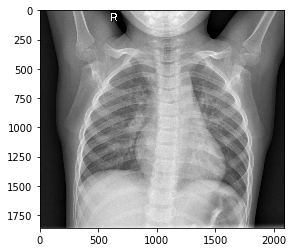

In [5]:
plt.imshow(reshaped_image, cmap='gray', vmin=0,vmax=255 ,
           interpolation='None') 

### np.expand_dims adds anothing dimension to the numpy array

#### -> We need this since Keras Data Augmentation needs 4 dimensions

In [6]:
print(image.shape)

(1858, 2090, 1)


In [7]:
# Extra dimension needs to be added to it , to allow the Data Augmentation to occur
image = np.expand_dims(image,axis=0)

In [8]:
print(image.shape)

(1, 1858, 2090, 1)


## Testing Keras ImageDataGenerator

#### Reminder that the rotation range is between - and + 

#### I.e If rotation value is 20 the range will be between -20 -> +20

In [138]:
aug = ImageDataGenerator(rotation_range=10,fill_mode="nearest")

In [139]:
image_gen = aug.flow(image,batch_size=1)


## The following shows a test run of 9 images generated from 1 image. Each image shows different rotations between -10 and 10

(1858, 2090, 1)


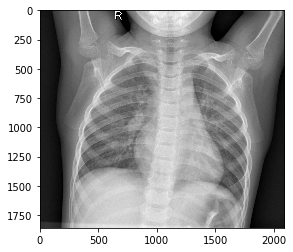

(1858, 2090, 1)


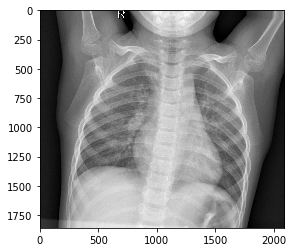

(1858, 2090, 1)


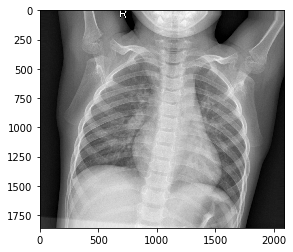

(1858, 2090, 1)


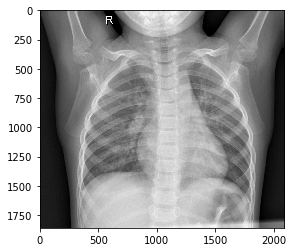

(1858, 2090, 1)


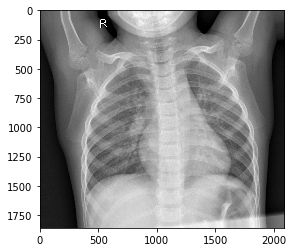

(1858, 2090, 1)


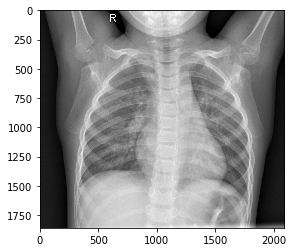

(1858, 2090, 1)


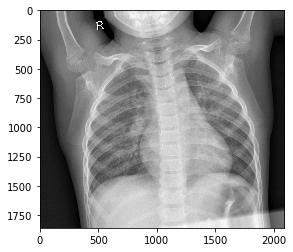

(1858, 2090, 1)


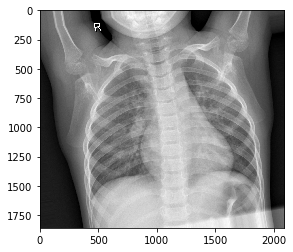

(1858, 2090, 1)


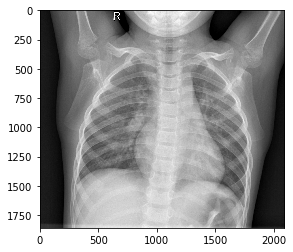

In [141]:
# Loop through to get back as many augmented images as needed
for i in range(0,9):
    batch = image_gen.next()
    rotated_image = batch[0].astype('float32')
    print(rotated_image.shape)
    rotated_image = rotated_image.reshape(1858,2090)
    pyplot.imshow(rotated_image, cmap='gray', vmin=0,vmax=255 ,
               interpolation='None') 
    pyplot.show()

## Augmenting the Normal Images 

### 1. Load in only the normal images 
### 2. Create a loop which will go through every image 
###  2.1 Convert to greyscale
###  2.2 Create ImageDataGenerator
###  2.3 Create .flow() object 
###  2.4 Create inner loop to loop through augmented images
###  2.5 Resize augmented image -: 250 x 250
###  2.6 Normalise data between 0-1
###  2.7 Append normlised pixel array to another array

### 3. Save image to array




In [143]:
import glob
from PIL import Image
import cv2


def augmentImages(arr,class_label,load_images):
    print(load_images)
    folder_expr = load_images + '/*.jpeg'
    
    
    for image_file_name in glob.glob(folder_expr): #Loop over images in folder
        image = Image.open(image_file_name).convert('L') #Convert to greyscale
        
        aug = ImageDataGenerator(rotation_range=50,fill_mode="nearest") #Create Image Augmentation object
        image = np.expand_dims(image,axis=0)
        image = np.expand_dims(image,axis=0)
        image_gen = aug.flow(image,batch_size=1) # Create .flow() object
        
        
        for i in range(0,1): # Loop to return the augmented image
            batch = image_gen.next() # Get the rotated image
            batch = batch[0]
            dimension = batch.shape
            batch = batch.reshape(dimension[1],dimension[2])
            im = Image.fromarray((batch))
            dsize = (250,250)
            image= im.resize(dsize)
            image_array = np.array(image)
            image_array = image_array.astype('float32')
            image_array /=255.0
            image_array=np.insert(image_array.flatten(),0,class_label,axis=0)
            arr.append(image_array)

            

    

In [128]:
load_images = "chest_xray/train/NORMAL"

In [129]:
normal_augmented_images = []
augmentImages(normal_augmented_images,0,load_images)

chest_xray/train/NORMAL


C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1858, 2090) (2090 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1152, 1422) (1422 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1209, 1488) (1488 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 758, 994) (994 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expec

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 833, 1506) (1506 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1310, 1446) (1446 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. exp

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1974, 2214) (2214 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1387, 1770) (1770 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1368, 1550) (1550 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1206, 1812) (1812 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1121, 1616) (1616 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1222, 1728) (1728 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 978, 1472) (1472 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1097, 1304) (1304 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. exp

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 974, 1196) (1196 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1191, 1422) (1422 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. exp

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1109, 1372) (1372 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 974, 1300) (1300 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. exp

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1225, 1472) (1472 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1318, 1472) (1472 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1375, 1632) (1632 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1518, 1728) (1728 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1715, 2214) (2214 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1209, 1512) (1512 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 2074, 2088) (2088 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1715, 1762) (1762 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1048, 1558) (1558 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1537, 1666) (1666 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1750, 2064) (2064 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1426, 1824) (1824 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1125, 1434) (1434 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 920, 1306) (1306 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. exp

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1480, 1762) (1762 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1167, 1628) (1628 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1059, 1550) (1550 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1595, 1902) (1902 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1341, 1624) (1624 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1746, 1944) (1944 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 2129, 2144) (2144 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1437, 1786) (1786 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1141, 1430) (1430 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1302, 1518) (1518 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1383, 1622) (1622 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1893, 2292) (2292 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1510, 1804) (1804 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1735, 1874) (1874 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1086, 1414) (1414 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1777, 2048) (2048 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1688, 1654) (1654 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1642, 1680) (1680 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1611, 1792) (1792 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1151, 1368) (1368 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1272, 1576) (1576 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1484, 1968) (1968 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1194, 1572) (1572 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 951, 1310) (1310 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. exp

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1040, 1346) (1346 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1086, 1284) (1284 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1399, 1546) (1546 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1854, 1898) (1898 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1205, 1538) (1538 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1606, 2101) (2101 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1079, 1368) (1368 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1106, 1558) (1558 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 874, 1238) (1238 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 959, 1298) (1298 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expe

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1032, 1542) (1542 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1217, 1650) (1650 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1982, 2068) (2068 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1333, 1404) (1404 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1568, 1696) (1696 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1469, 1688) (1688 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1843, 2234) (2234 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1437, 1700) (1700 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1136, 1510) (1510 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1816, 1920) (1920 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1647, 1878) (1878 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 769, 1186) (1186 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. exp

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1294, 1500) (1500 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1422, 1802) (1802 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1128, 1336) (1336 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1048, 1376) (1376 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1368, 1678) (1678 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1341, 1754) (1754 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1164, 1538) (1538 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1499, 1800) (1800 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1428, 1675) (1675 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1312, 1395) (1395 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1464, 1600) (1600 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1743, 2090) (2090 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1105, 1402) (1402 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1905, 1948) (1948 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1349, 1508) (1508 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1276, 1662) (1662 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1137, 1496) (1496 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1249, 1500) (1500 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1920, 1960) (1960 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1160, 1450) (1450 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 2625, 2694) (2694 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1020, 1414) (1414 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1248, 1458) (1458 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1067, 1426) (1426 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1128, 1360) (1360 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1008, 1288) (1288 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1310, 1620) (1620 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1268, 1500) (1500 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1793, 2056) (2056 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1353, 1716) (1716 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1468, 2026) (2026 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1487, 1644) (1644 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1310, 1518) (1518 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1438, 1588) (1588 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1565, 1898) (1898 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1105, 1376) (1376 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1460, 1570) (1570 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 792, 1056) (1056 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. exp

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1337, 1686) (1686 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1708, 1920) (1920 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 2325, 2450) (2450 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1518, 1944) (1944 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1156, 1422) (1422 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1619, 1978) (1978 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1097, 1360) (1360 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1936, 2252) (2252 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1328, 1440) (1440 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 1080, 1288) (1288 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
C:\Users\jozic\Anaconda3\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. ex

In [130]:
normal_image = np.array(normal_augmented_images)

In [142]:
normal_image.shape

(1341, 62501)

## Save The Augmented Images as numpy file

In [135]:
from numpy import save
save('augmented_normal_data.npy',normal_image)

## Load in the augmented images 

In [136]:
from numpy import load
loaded_npy = load('augmented_normal_data.npy')

In [137]:
loaded_npy.shape

(1341, 62501)

## End of Notebook